### 工作進度  
* **新的筆記內容架構**與**量化技術分析系統**相關資訊請參閱[250801筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/250801%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。    
* 本日「K線追擊週報」LINE群組日報：[楊忠憲K線追擊週報_250812日報.docx](https://mega.nz/file/f8RxgYLB#Wo3ONoBWkgx-pE5IsvmB7QyixU-Ls0P2z_bgqvGHFMo)。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
import base64
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-08-12 21:54:16.673 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
##### 更新技術分析資料 #####


2025-08-12 21:54:21.058 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:54:51.550 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:55:02.472 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:55:33.715 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:55:38.839 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:56:09.220 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:56:14.356 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:56:44.263 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-12 21:56:49.428 | INFO     | FinMind.data.finmind_api:get_data:155 - download Ta

日K：2025-08-12


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


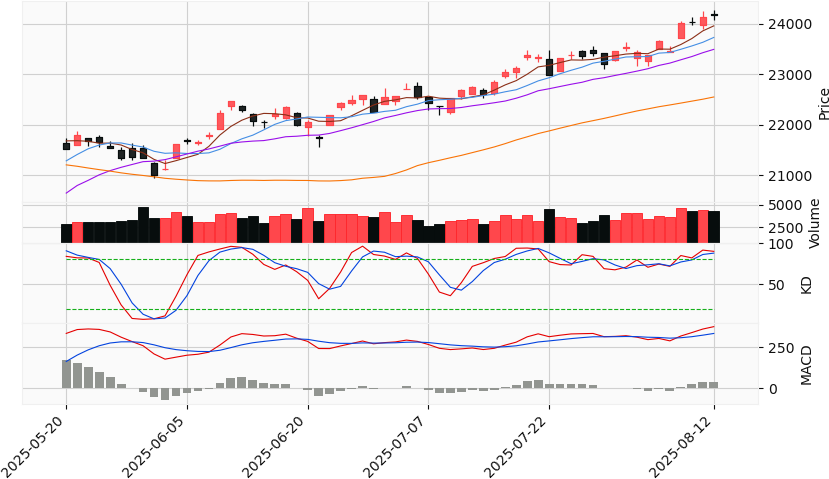

In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

解盤內容：


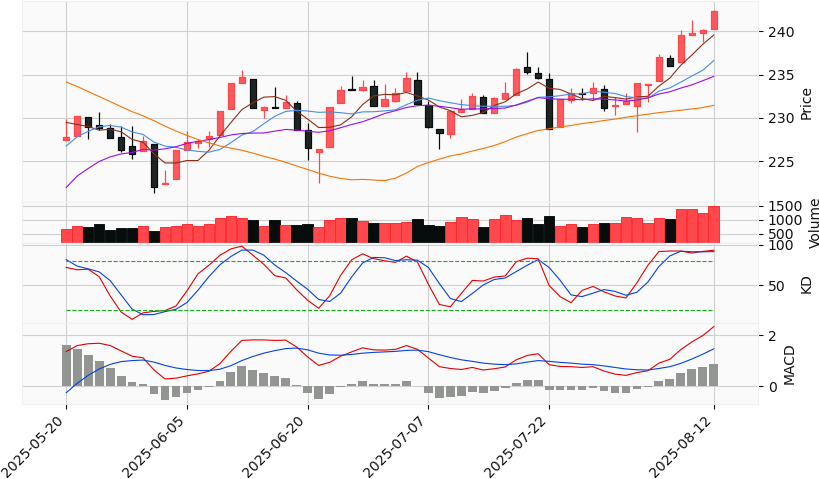

In [6]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股解盤  

* 飛宏(2457)  
  看法：突破後拉回，回測頸線支撐有守。  

> **盤後**：量化技術分析  

解盤內容：


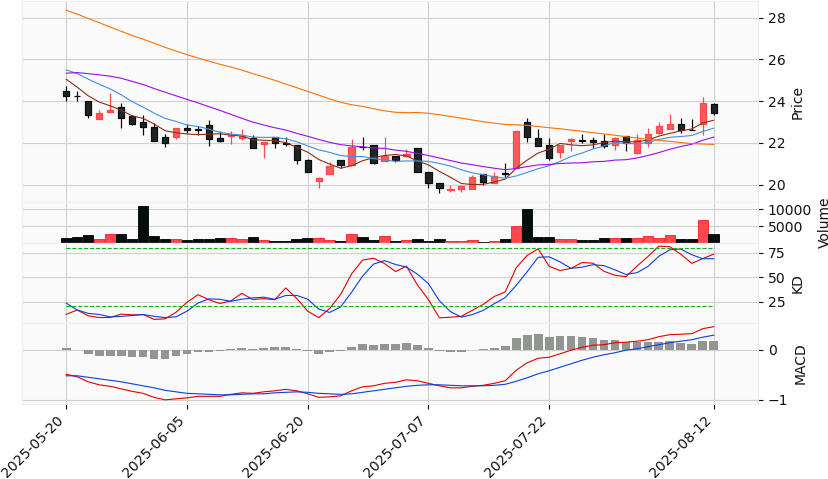

In [7]:
stock_analysis(analysis,'2457')

> **盤後**：底部反轉交易策略分析   

In [8]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-05-27'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-06-05']['High']

    # 設定底部到頸線差距
    bottom_date  = '2025-07-09'
    bottom_price = range_prices.loc['2025-07-09']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-08-11'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為26.05元


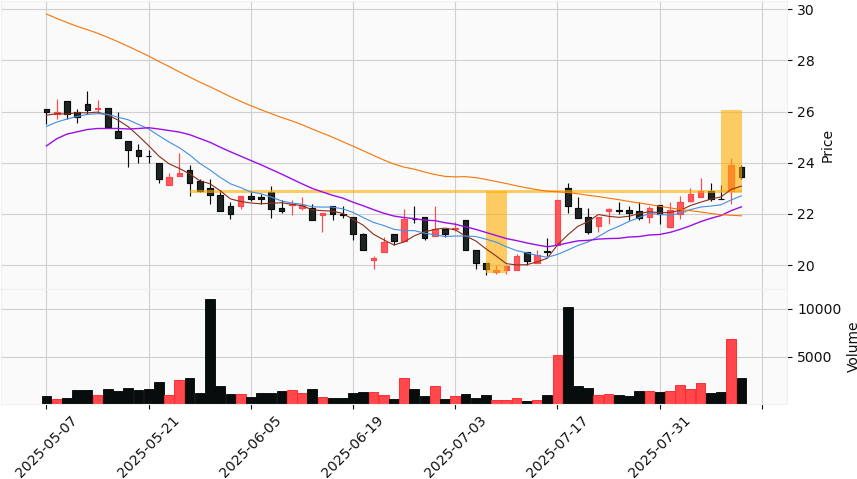

In [9]:
image = mysys.DrawOnKlineChart('2457','2025-05-07','2025-08-12',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-494)：外資小賣(-503)、投信中立(0)、自營中立(+9)。  
主力小賣(-378)。  
分公司買賣家數差分散(-91)。  
融資中立(+21)、融券中立(+7)。    